In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Store the features and target in a DataFrame- there are 253680 rows × 22 columns
df = pd.DataFrame(X)
df['Diabetes_binary']=y
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


# Data Pre-processing

In [5]:
#Data Pre-processing
#check the number of rows and columns
df.shape

(253680, 22)

In [6]:
#the number of columns and rows
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [7]:
#Check for null values 
null_values = df.isnull().sum()
null_values
#we can see that there are no null values in the dataset 

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [8]:
#checking the datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [9]:
#checking for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

24206

In [6]:
#Checking wheter the nature of these duplicate rows
duplicate_rows_df=df[df.duplicated()] 
duplicate_rows_df['Diabetes_binary'].value_counts()

#0=non diabetic
#1=diabetic
#we can see that 23957 rows have non diabetic patients and 249 diabetic
#That is roughly 85 percent of duplicated data gives output as non-diabetic. It is highly imbalanced and will lead to overfitting
#Hence, we can drop these duplicate rows

Diabetes_binary
0    23957
1      249
Name: count, dtype: int64

In [7]:
#Dropping duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(229474, 22)

# Exploratory Data Analysis

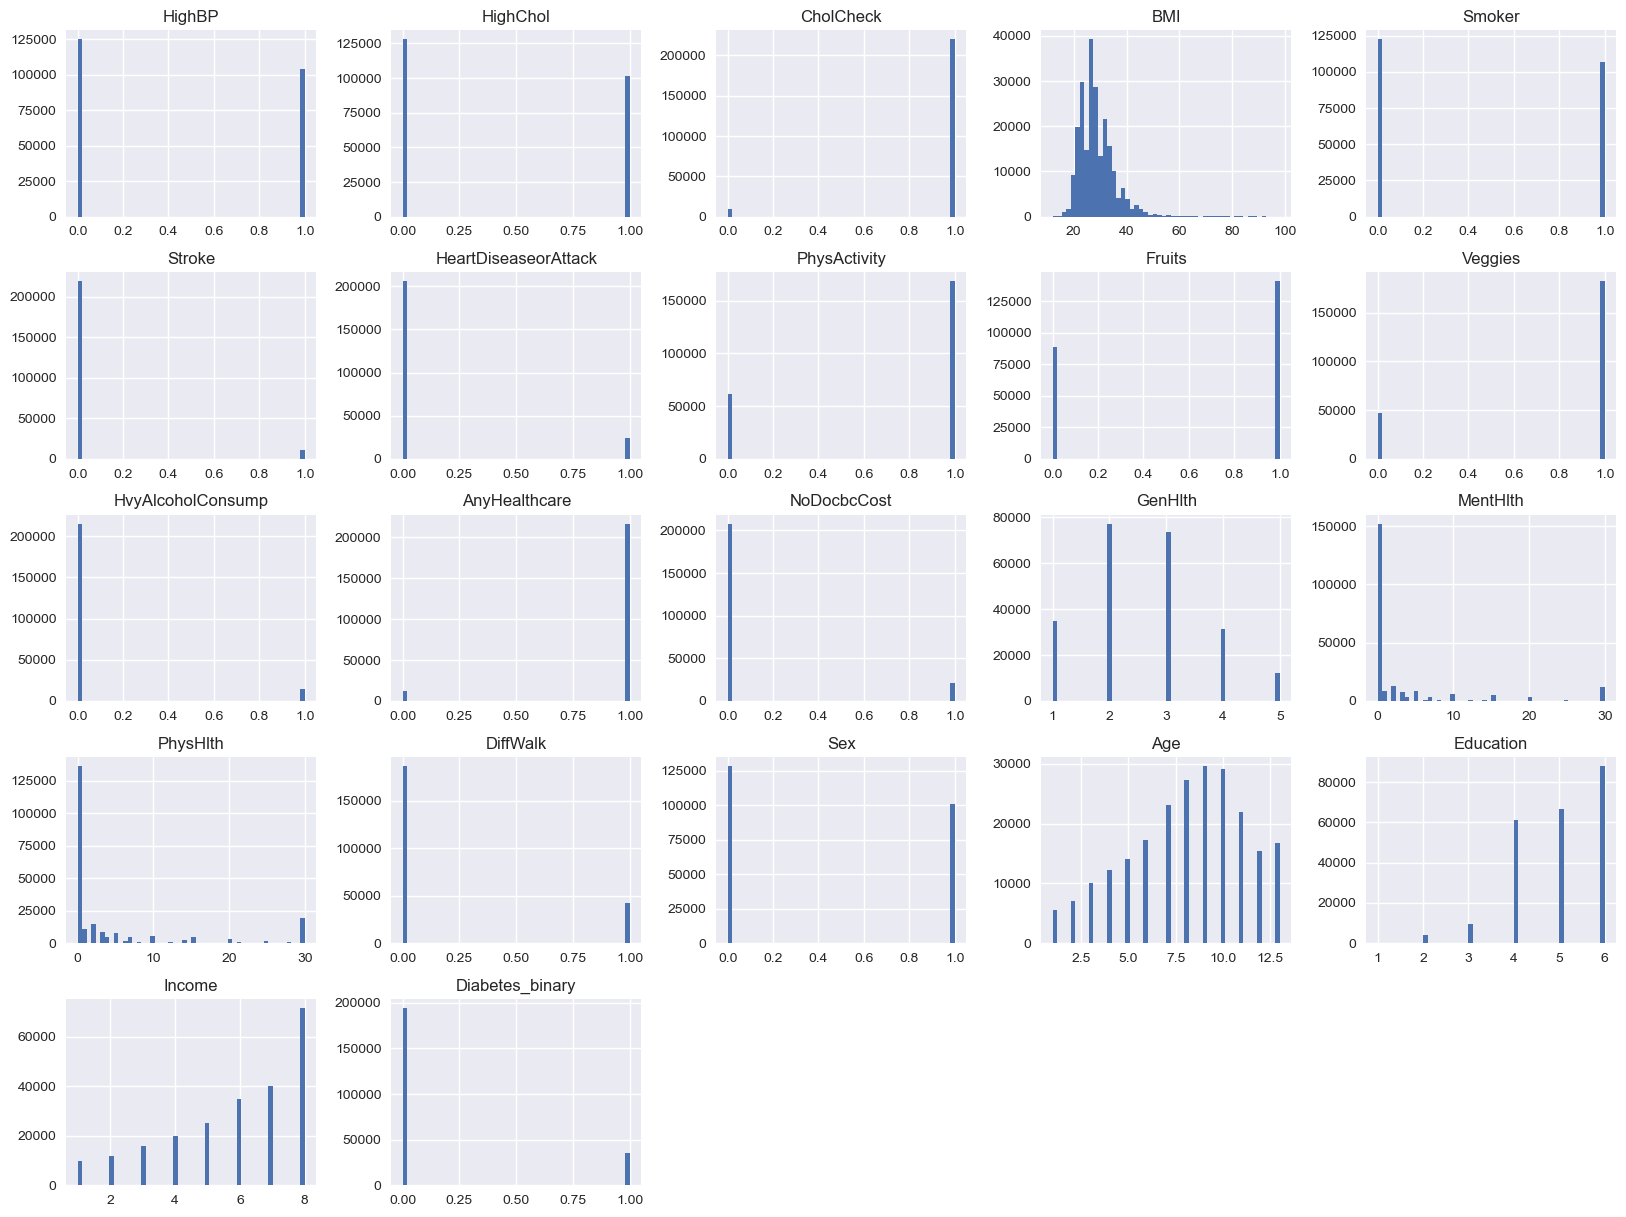

In [43]:
#Target Variable: Diabetes_binary

import seaborn as sns
plt.style.use('seaborn')
#Plot for all the features 
df.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: xlabel='Diabetes_binary', ylabel='count'>

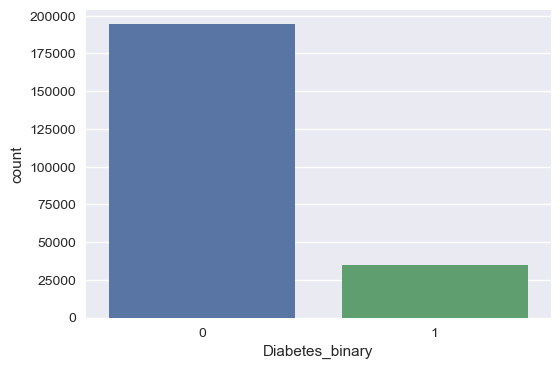

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Diabetes_binary'])

In [14]:
df['Diabetes_binary'].value_counts(normalize=True)
#We can see 84.7% of data is of patients who are 'non-diabetic' and 15.2% who are 'diabetic'
#indicates that data is highly imbalanced- it may lead to overfitting of model

Diabetes_binary
0    0.847055
1    0.152945
Name: proportion, dtype: float64

In [15]:
#Divide features into binary, ordinal, numerical features
#by doing this, we can understand which feature is highly correlated(positively or negatively)

binary_feat=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
ordinal_feat = ['GenHlth', 'Age', 'Education', 'Income']
numerical_feat=['BMI', 'MentHlth', 'PhysHlth']

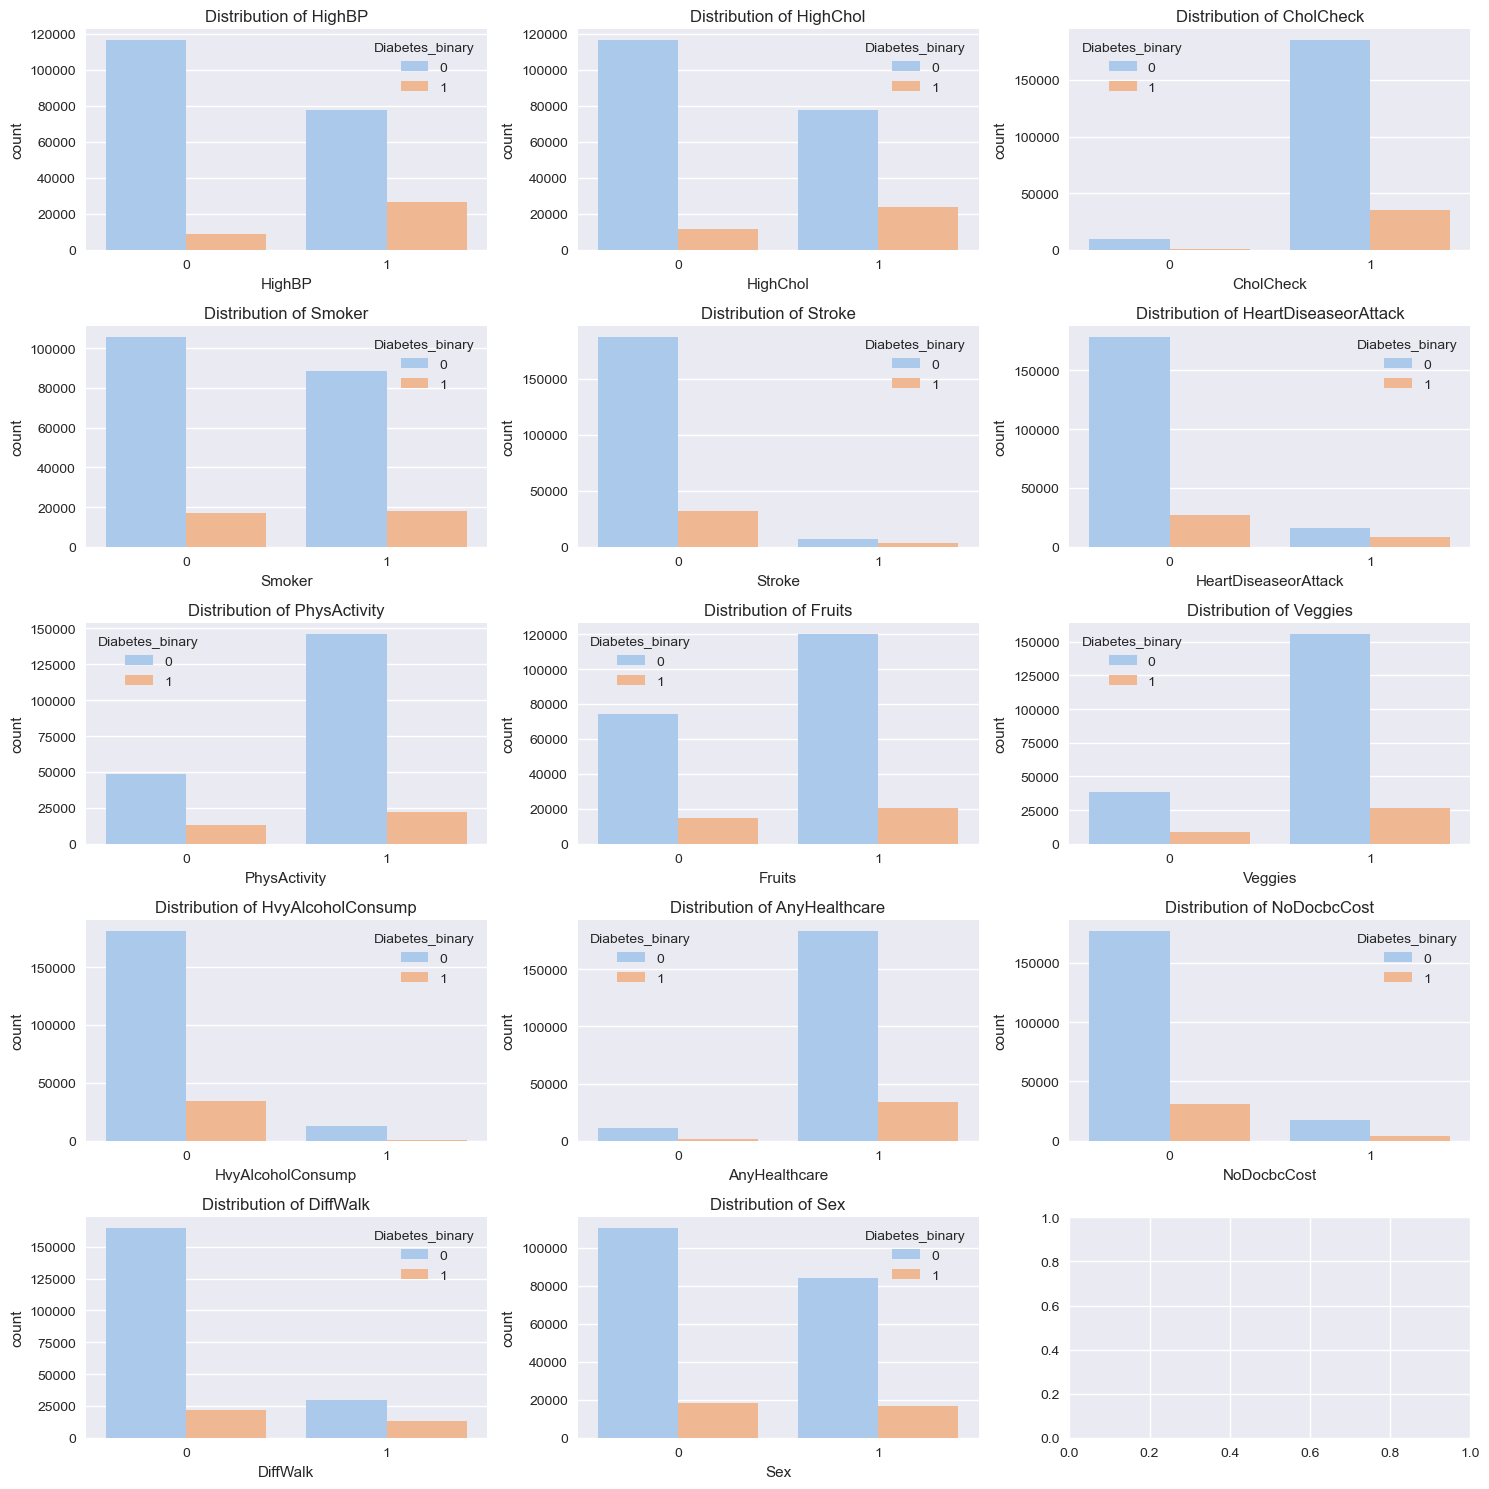

In [16]:
#plotting each binary feature
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)


for i, feature in enumerate(binary_feat):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [17]:
#From above charts, following conclusions can be made:
#1. Comparing distributions btwn non-diabetic(0) and diabetic(1), features like: 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk'  have large proportion of diabetic patients- helpful to determine if a patient has diabetes
#2. Features like:  'PhysActivity', 'Fruits', 'Veggies' have more non-diabetic patients- helpful in determing if a patient is non-diabetic

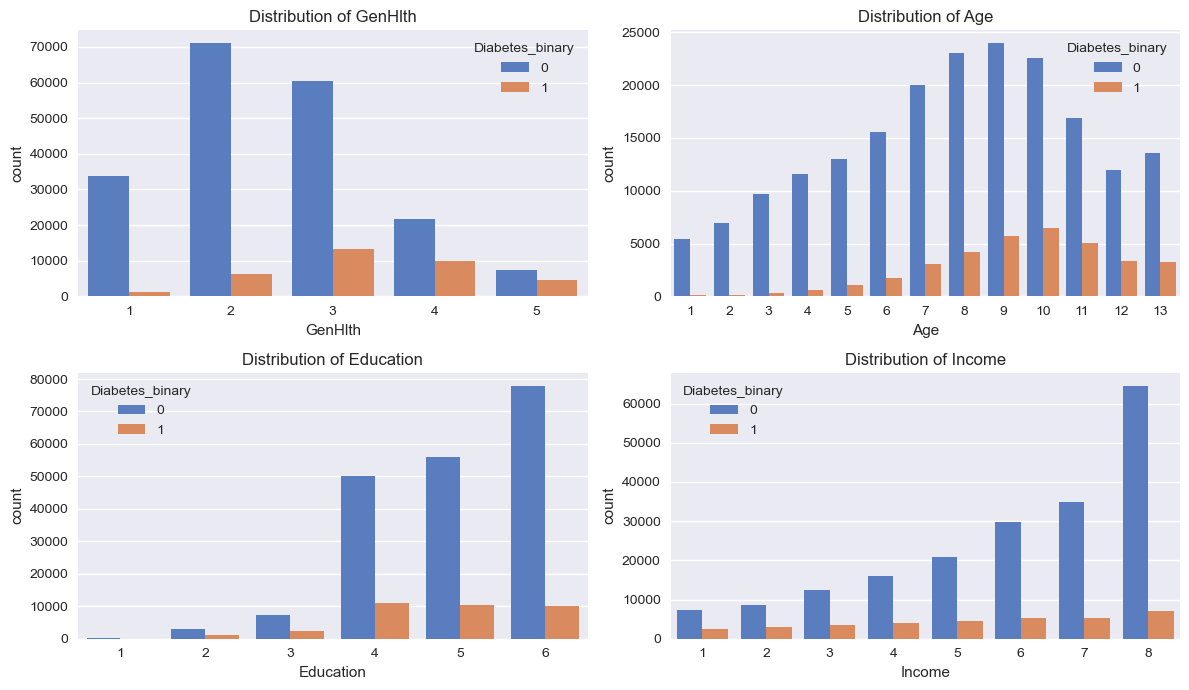

In [18]:
#Plotting for ordinal features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(ordinal_feat):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [19]:
#observations from above graph:
#1. Diabetic patients have a high score GenHealth, which indicates poor general health (1=Excellent, ..,5=poor)
#2. Age range(1-13): 1=18-24 yrs,..,9=60-64 yrs, 13= 80 yrs or older
#   Diabetic patients tender to be older
#3. Education - middle range of people are diabetic, that means less educated
#4. Income - as compared to non-diabetics, lower income range people are diabetic
# these features are helpful to determine a diabetic patient

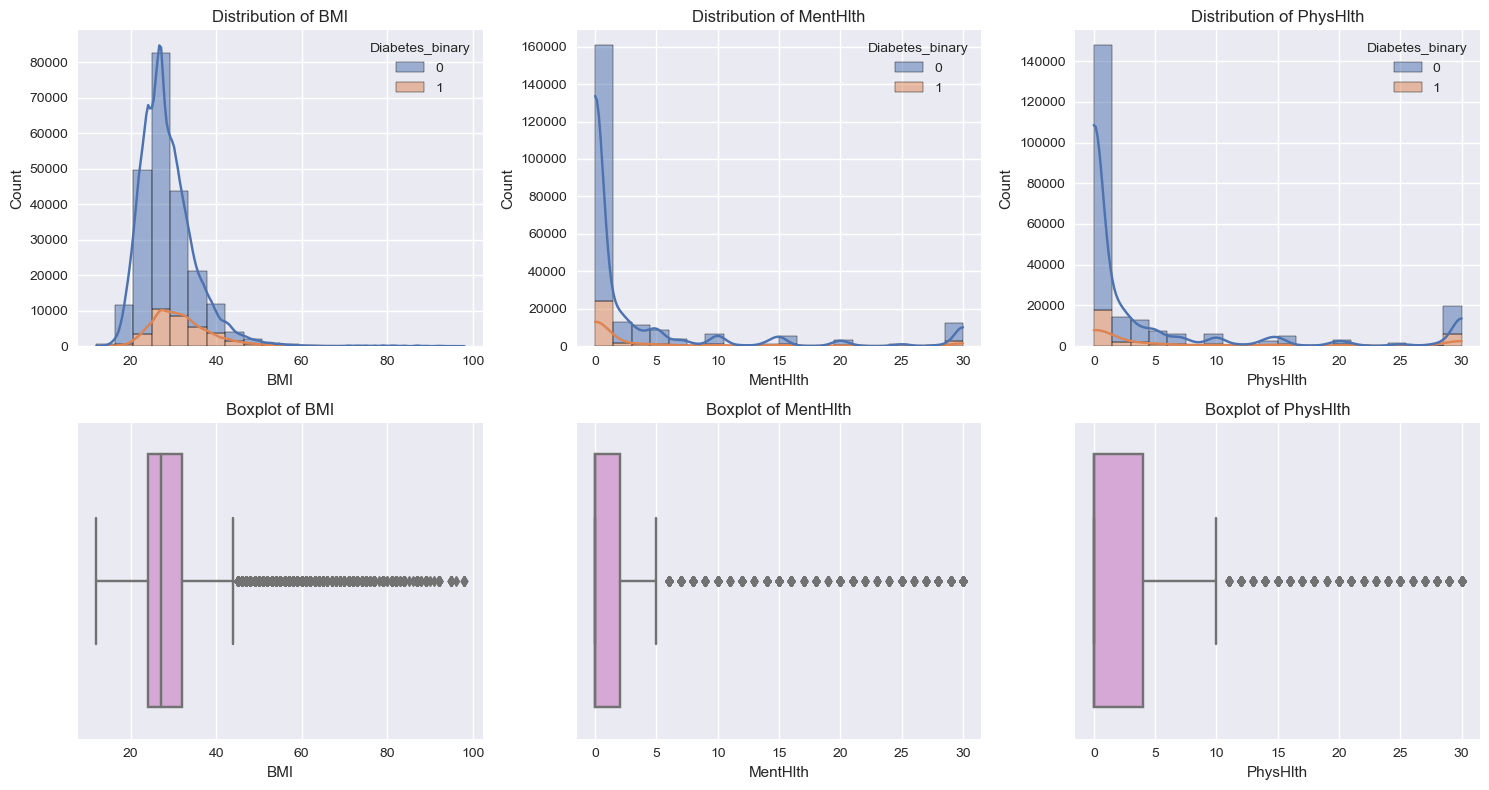

In [20]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(numerical_feat, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20, hue='Diabetes_binary', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')

    plt.subplot(2, 3, i + 3)
    sns.boxplot(x=df[feature], color='plum')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [21]:
#Observations:
#most of the box plots have outliers
##BMI- mostly between 20-40
#MentalHealth, PhysicalHealth- user select 0 when they do not have any issues with physical or mental health- hence the outliers are necessary
#MentalHealth- between 0-5
#PhysicalHealth- between 0-5
#as BMI is an important factor, we need to analyze it more

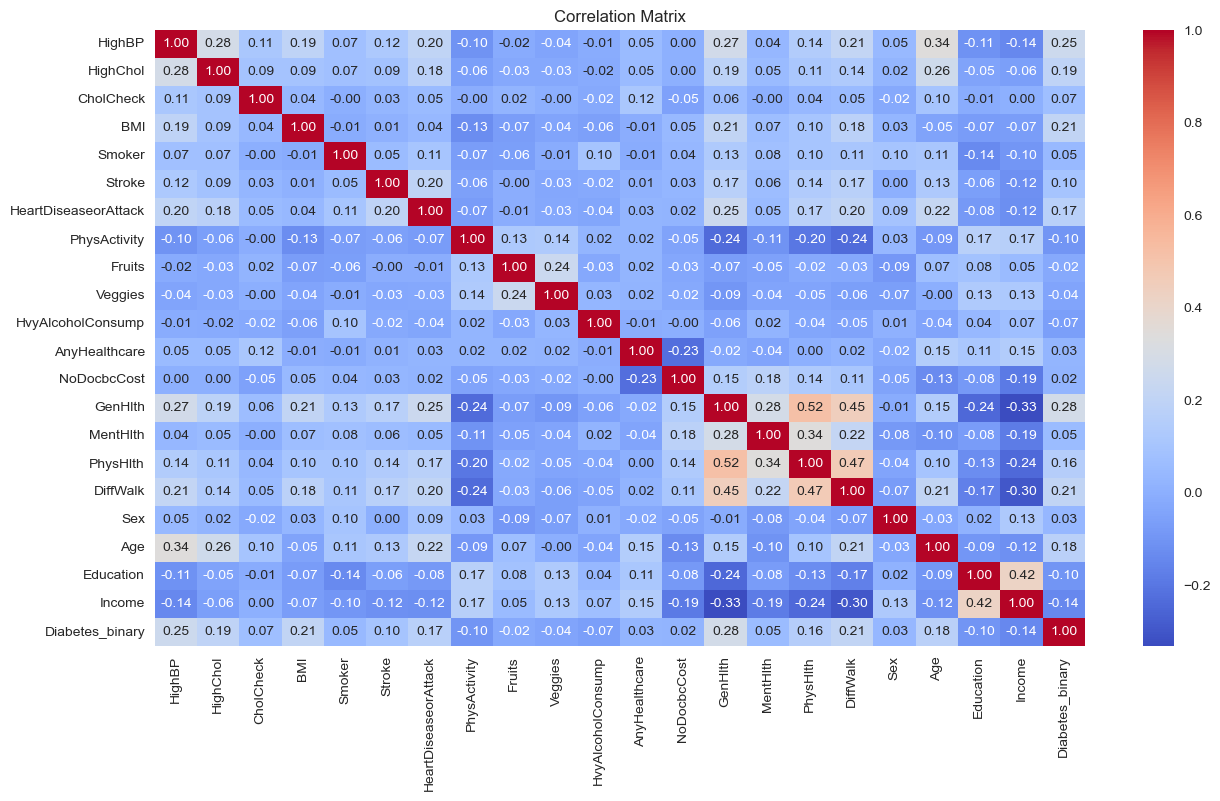

In [22]:
#Correlation Matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
#Observations from heatmap:
#1. There are no highly positively related features
#2. There are few which are moderately related, but eventually they are strongly associated with target variables, hence we can keep all these variables.

# Train Test Split

In [8]:
#Independent features:
X=df.drop(columns = 'Diabetes_binary')
#Target variable:
y=df['Diabetes_binary']

In [25]:
X.shape

(229474, 21)

In [26]:
y.shape

(229474,)

In [9]:
#Split in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify = y)


In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183579, 21) (45895, 21) (183579,) (45895,)


# Hyperparameter Tuning

In [32]:
#Hyperparameter tuning for Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

#Random forest classifier
random_forest=RandomForestClassifier()

#Grid search with cross validation
grid = GridSearchCV(random_forest,       # model to use
                    param_grid, # parameters to search over
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = 10,
                    n_jobs = -1
                   )
grid.fit(X_train, y_train)

#select best parameters
print("Best parameters for Random forest based on GridSearchCV", grid.best_params_)
print(grid.best_score_)

Best parameters for Random forest based on GridSearchCV {'max_depth': 20, 'max_leaf_nodes': 150, 'min_samples_split': 200}
0.8521290562942122


# Function Definition for Performance Metrics

In [29]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, brier_score_loss

#Performance metrics calculations
def performance_metrics(y_true, y_pred):
    conf_matrix=confusion_matrix(y_true,y_pred)
    TP=conf_matrix[1,1]
    TN=conf_matrix[0,0]
    FP=conf_matrix[0,1]
    FN=conf_matrix[1,0]
     
    P= TP + FN # number of positive examples
    N= TN + FP
    
    TPR= TP / P #true positive rate
    TNR= TN / N
    FPR= FP / N
    FNR= FN / P
    
    r= TP / P   #Recall/Sensitivity
    pr= TP / (TP + FP) #Precision
    
    f1_score=2*(pr * r)/(pr + r)
    
    acc=(TP + TN)/(P + N) #Accuracy
    
    err=(FP + FN)/(P + N) #Error Rate
    
    bacc=(TPR + TNR)/2   #Balanced Accuracy
    
    tss=TP / (TP+FN) - FP /(FP+TN)  #True Skill Statistics
    
    #num=2*[(TP*TN) - (FN*FP)]
    #den=P*(FN+TN) + N*(TP+FP)
    
    hss=2 * (TP * TN - FP *FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) # Heidke Skill Score 
    
    acc_by_package_fn = accuracy_score(y_true, y_pred)
    
    brier = brier_score_loss(y_true, y_pred)
    
    auc = roc_auc_score(y_true, y_pred)
    
    #return TP, TN, FP, FN, TPR, TNR, FPR, FNR, r, pr, f1_score, acc, err, bacc, tss, hss
    return TP, TN, FP, FN, TPR, TNR, FPR, FNR, r, pr, f1_score, acc, err, bacc, tss, hss, acc_by_package_fn, brier, auc

    
    
    

In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

from tensorflow import keras
from tensorflow.keras import layers

In [32]:
X_train.iloc[0]

HighBP                   0
HighChol                 0
CholCheck                1
BMI                     24
Smoker                   0
Stroke                   0
HeartDiseaseorAttack     0
PhysActivity             1
Fruits                   1
Veggies                  1
HvyAlcoholConsump        0
AnyHealthcare            1
NoDocbcCost              0
GenHlth                  1
MentHlth                 0
PhysHlth                 1
DiffWalk                 0
Sex                      0
Age                      2
Education                5
Income                   8
Name: 43495, dtype: int64

# Random Forest Classifier

In [33]:
#10 fold cross validation 
kfold= StratifiedKFold(n_splits=10, shuffle=True,random_state=88)
rf_per_metrics=[]

for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #Random Forest Classifier
    rf=RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=15, max_leaf_nodes = 150, min_samples_split = 200, class_weight='balanced',random_state=88)
    rf.fit(X_train,y_train)
    y_test_pred_rf = rf.predict(X_test)
    rf_per_metrics.append(performance_metrics(y_test,y_test_pred_rf))
    

# Support Vector Machine Classifier

In [35]:
import warnings 
warnings.filterwarnings('ignore')

In [36]:
#10 fold cross validation 
kfold= StratifiedKFold(n_splits=10, shuffle=True,random_state=88)
svm_per_metrics=[]

for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #SVM Classifier
    svc=LinearSVC(class_weight='balanced', dual=True)
    svc.fit(X_train, y_train)
    y_test_pred_svm=svc.predict(X_test)
    svm_per_metrics.append(performance_metrics(y_test,y_test_pred_svm))
        

# LSTM

In [42]:
#10-fold cross validation
kfold= StratifiedKFold(n_splits=10, shuffle=True,random_state=88)
lstm_per_metrics=[]

for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lstm=Sequential()
    #First layer
    lstm.add(LSTM(32,activation='tanh',input_shape=(X_train.shape[1],1)))
    lstm.add(Dense(1, activation='sigmoid')) #output layer
    #compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    #fit the model
    lstm.fit(X_train, y_train, epochs=10,  batch_size=32)
    y_pred_lstm = lstm.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
    y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)
    lstm_per_metrics.append(performance_metrics(y_test, y_pred_lstm_binary))

Epoch 1/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.8394 - loss: 0.3926
Epoch 2/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - accuracy: 0.8488 - loss: 0.3586
Epoch 3/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8487 - loss: 0.3542
Epoch 4/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8510 - loss: 0.3464
Epoch 5/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8518 - loss: 0.3447
Epoch 6/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8530 - loss: 0.3417
Epoch 7/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.8516 - loss: 0.3443
Epoch 8/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.8522 - loss: 0.3421
Epoch 9/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.8532 - loss: 0.3398
Epoch 10/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8530 - loss: 0.3407
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/10
6454/6454 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0

# Performance Metrics for Random Forest

In [46]:
#Showing performance metrics for each iteration
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR','Recall','Precision','F1 Score', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 'Acc_by_package_fn','Brier Score','AUC']

metric_index_df = ['iter1', 'iter2', 'iter3', 'iter4', 'iter5', 'iter6','iter7', 'iter8', 'iter9', 'iter10']

rf_metrics_df = pd.DataFrame(rf_per_metrics, columns=metric_columns,index=metric_index_df)

for i, metrics_df in enumerate([rf_metrics_df], start=1):
    print('\nPerformance Metrics for Random Forest Classifier: \n')
    print(metrics_df.round(decimals=2).T)
    print('\n')


Performance Metrics for Random Forest Classifier: 

                      iter1     iter2     iter3     iter4     iter5     iter6  \
TP                  2731.00   2737.00   2734.00   2711.00   2695.00   2715.00   
TN                 13364.00  13478.00  13396.00  13667.00  13406.00  13588.00   
FP                  6074.00   5960.00   6042.00   5771.00   6032.00   5850.00   
FN                   779.00    773.00    776.00    799.00    814.00    794.00   
TPR                    0.78      0.78      0.78      0.77      0.77      0.77   
TNR                    0.69      0.69      0.69      0.70      0.69      0.70   
FPR                    0.31      0.31      0.31      0.30      0.31      0.30   
FNR                    0.22      0.22      0.22      0.23      0.23      0.23   
Recall                 0.78      0.78      0.78      0.77      0.77      0.77   
Precision              0.31      0.31      0.31      0.32      0.31      0.32   
F1 Score               0.44      0.45      0.45      0.4

# Performance Metrics for SVM 

In [47]:
#Showing performance metrics for each iteration
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR','Recall','Precision','F1 Score', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 'Acc_by_package_fn','Brier Score','AUC']

metric_index_df = ['iter1', 'iter2', 'iter3', 'iter4', 'iter5', 'iter6','iter7', 'iter8', 'iter9', 'iter10']

svm_metrics_df = pd.DataFrame(svm_per_metrics, columns=metric_columns,index=metric_index_df)
for i, metrics_df in enumerate([svm_metrics_df], start=1):
    print('\nPerformance Metrics for SVM Classifier: \n')
    print(metrics_df.round(decimals=2).T)
    print('\n')


Performance Metrics for SVM Classifier: 

                      iter1     iter2     iter3     iter4     iter5     iter6  \
TP                   724.00   1724.00     22.00      6.00     18.00    921.00   
TN                 18752.00  16658.00  19424.00  19437.00  19419.00  18338.00   
FP                   686.00   2780.00     14.00      1.00     19.00   1100.00   
FN                  2786.00   1786.00   3488.00   3504.00   3491.00   2588.00   
TPR                    0.21      0.49      0.01      0.00      0.01      0.26   
TNR                    0.96      0.86      1.00      1.00      1.00      0.94   
FPR                    0.04      0.14      0.00      0.00      0.00      0.06   
FNR                    0.79      0.51      0.99      1.00      0.99      0.74   
Recall                 0.21      0.49      0.01      0.00      0.01      0.26   
Precision              0.51      0.38      0.61      0.86      0.49      0.46   
F1 Score               0.29      0.43      0.01      0.00      0.0

# Performance Metrics for LSTM

In [49]:
#Showing performance metrics for each iteration
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR','Recall','Precision','F1 Score', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 'Acc_by_package_fn','Brier Score','AUC']

metric_index_df = ['iter1', 'iter2', 'iter3', 'iter4', 'iter5', 'iter6','iter7', 'iter8', 'iter9', 'iter10']

lstm_metrics_df = pd.DataFrame(lstm_per_metrics, columns=metric_columns,index=metric_index_df)

for i, metrics_df in enumerate([lstm_per_metrics], start=1):
    print('\nPerformance Metrics for LSTM Classifier: \n')
    print(metrics_df.round(decimals=2).T)
    print('\n')


Performance Metrics for LSTM Classifier: 

                      iter1     iter2     iter3     iter4     iter5     iter6  \
TP                   453.00    311.00    409.00    448.00    393.00    914.00   
TN                 19119.00  19248.00  19158.00  19143.00  19187.00  18523.00   
FP                   319.00    190.00    280.00    295.00    251.00    915.00   
FN                  3057.00   3199.00   3101.00   3062.00   3116.00   2595.00   
TPR                    0.13      0.09      0.12      0.13      0.11      0.26   
TNR                    0.98      0.99      0.99      0.98      0.99      0.95   
FPR                    0.02      0.01      0.01      0.02      0.01      0.05   
FNR                    0.87      0.91      0.88      0.87      0.89      0.74   
Recall                 0.13      0.09      0.12      0.13      0.11      0.26   
Precision              0.59      0.62      0.59      0.60      0.61      0.50   
F1 Score               0.21      0.16      0.19      0.21      0.

# Average Performance for each Classifier

In [52]:
rf_avg_df=rf_metrics_df.mean()
svm_avg_df=svm_metrics_df.mean()
lstm_avg_df=lstm_metrics_df.mean()

avg_performance_df=pd.DataFrame({'RF': rf_avg_df, 'SVM': svm_avg_df, 'LSTM': lstm_avg_df}, index=metric_columns)

print('Average Performance Metrics of each Classifier\n')
print(avg_performance_df.round(decimals=2))
print('\n')

Average Performance Metrics of each Classifier

                         RF       SVM      LSTM
TP                  2728.90   1120.80    470.40
TN                 13490.30  16359.10  19082.80
FP                  5947.40   3078.60    354.90
FN                   780.80   2388.90   3039.30
TPR                    0.78      0.32      0.13
TNR                    0.69      0.84      0.98
FPR                    0.31      0.16      0.02
FNR                    0.22      0.68      0.87
Recall                 0.78      0.32      0.13
Precision              0.31      0.47      0.59
F1 Score               0.45      0.22      0.21
Accuracy               0.71      0.76      0.85
Error_rate             0.29      0.24      0.15
BACC                   0.74      0.58      0.56
TSS                    0.47      0.16      0.12
HSS                    0.29      0.14      0.17
Acc_by_package_fn      0.71      0.76      0.85
Brier Score            0.29      0.24      0.15
AUC                    0.74      0.58   

# ROC Curve

In [53]:
# features=df.iloc[:, :-1]
# labels=df.iloc[:, -1]
# features_train_all, features_test_all, labels_train_all, labels_test_all =train_test_split(features, labels, test_size=0.1, random_state=21, stratify=labels)
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,0.794587,...,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615,0.152945
std,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,0.404004,...,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888,0.359936
min,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


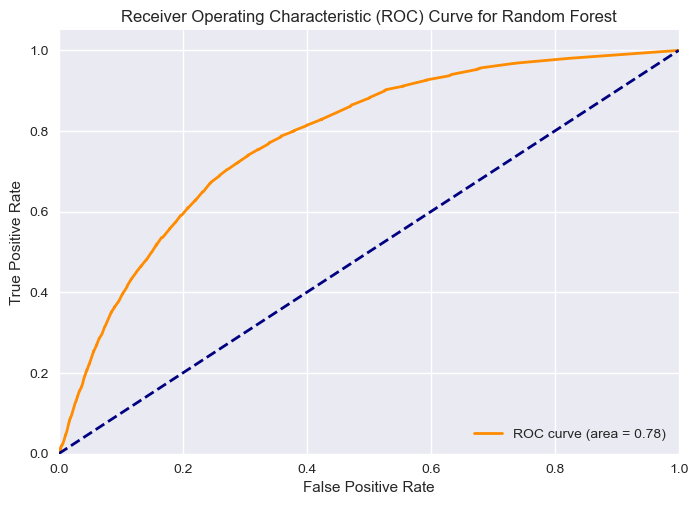

In [56]:
from sklearn.metrics import roc_curve, auc
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()